<a href="https://colab.research.google.com/github/Sindhujashree-17/SCT_DS_TASKS/blob/main/SCT_DS_TASK03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [22]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [24]:
# Encode categorical features using Label Encoding
label_encoders = {}
for column in data.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [25]:
X = data.drop(columns=[target_column]) # Using the original target column name "deposit"
y = data[target_column]  # Using the original target column name "deposit"

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
clf = DecisionTreeClassifier(random_state=42, max_depth=5)  # Limit depth to prevent overfitting
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [28]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.8069861173309449
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1175
           1       0.76      0.86      0.81      1058

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



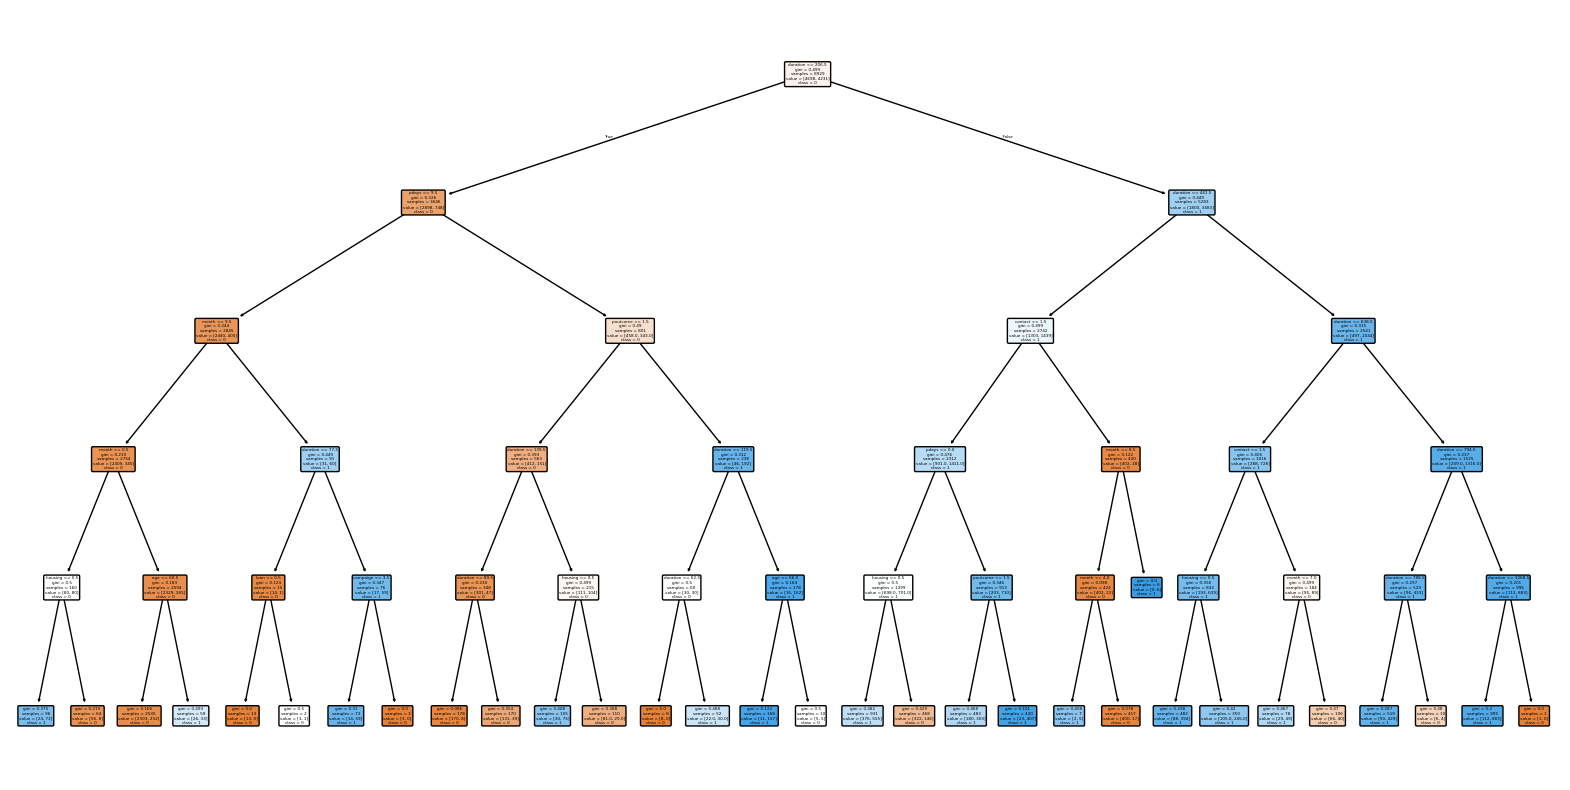

In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming 'clf', 'X_train', 'y_train', and 'X' are already defined

clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))

# Convert class names to strings
class_names = [str(c) for c in clf.classes_]  # Convert clf.classes_ elements to strings

plot_tree(clf, filled=True, feature_names=X.columns, class_names=class_names, rounded=True)
plt.show()

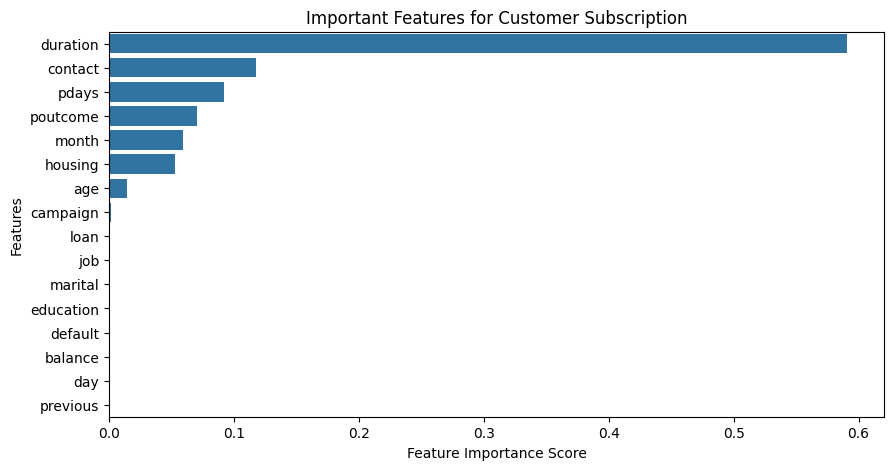

In [30]:
import seaborn as sns

importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=importances.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Important Features for Customer Subscription")
plt.show()

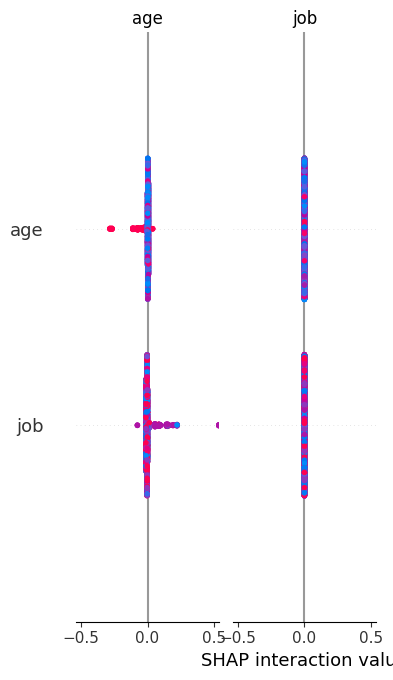

In [31]:
import shap

# Create SHAP explainer
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_test)

# Visualize SHAP summary plot
shap.summary_plot(shap_values, X_test)